In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split

In [2]:
civs_path = r'C:\Users\Conno\OneDrive\Desktop\fruits'

In [3]:
path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)

9


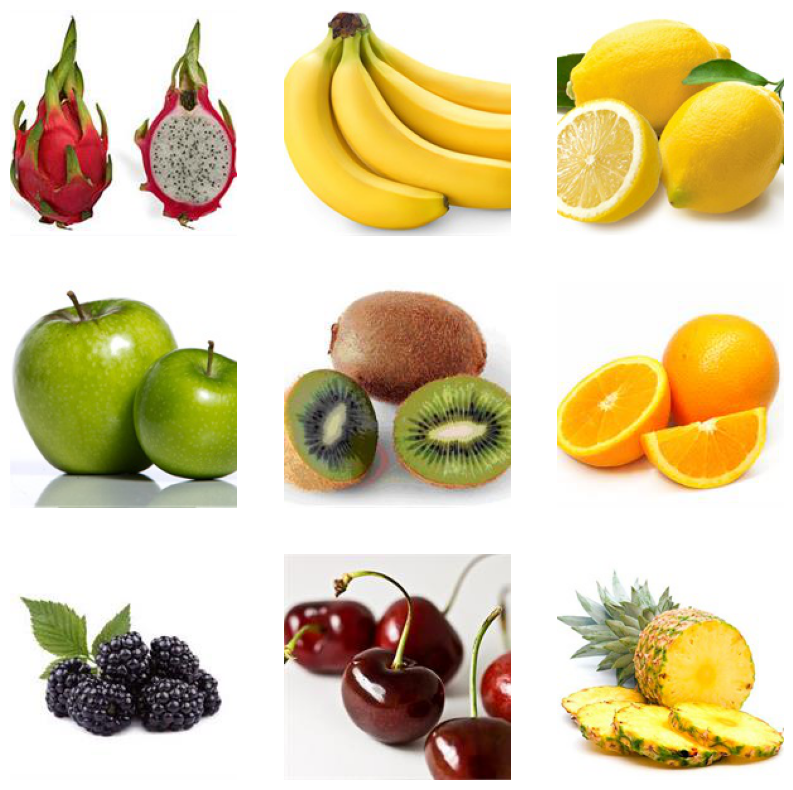

In [4]:
_, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [10]:
def label_func2(fname):
    ## print(fname)
    fname = fname.replace(r"C:\Users\Conno\OneDrive\Desktop\fruits","")
    fname = fname.replace(".jpg","")
    fname = fname.replace("\\","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## fruit
    y1 = float(temp_name[1].replace("color", ""))     ## color
    y2 = float(temp_name[2].replace("shape", ""))    ## shape
    #y3 = float(temp_name[3].replace("H", ""))     ## 'H0'
    #y4 = float(temp_name[4].replace("Wp", ""))     ## 'Wp0'
    #y5 = float(temp_name[5].replace("Ph", ""))     ## 'Ph300'
    #y6 = float(temp_name[6].replace("Ox", ""))    ## 'Ox24'
    #y7 = float(temp_name[7].replace("Ow", ""))     ## 'Ow7
    #y8 = float(temp_name[8].replace("Hbt", ""))    ## 'Hbt1459.8'
    #y9 = float(temp_name[9].replace("Wm", ""))    ## 'Wm12.2'
    #y10 = float(temp_name[10].replace("Wr", ""))    ## 'Wr308750.4'
    
 
    ## np.array([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10 ])
    return [fname, y0, y1, y2]

In [11]:
list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    print(temp_label_vector_rc)
    if temp_label_vector_rc[1] == "fruit":
    
        ## print(img_np.shape)
        list_imgs.append(img_np)

        list_label_vectors.append( temp_label_vector_rc )
        
print(list_imgs)
print(list_label_vectors)

['fruit_color4_shape4', 'fruit', 4.0, 4.0]
['fruit_color2_shape2', 'fruit', 2.0, 2.0]
['fruit_color2_shape4', 'fruit', 2.0, 4.0]
['fruit_color5_shape1', 'fruit', 5.0, 1.0]
['fruit_color5_shape4', 'fruit', 5.0, 4.0]
['fruit_color6_shape1', 'fruit', 6.0, 1.0]
['fruit_color3_shape3', 'fruit', 3.0, 3.0]
['fruit_color1_shape1', 'fruit', 1.0, 1.0]
['fruit_color2_shape5', 'fruit', 2.0, 5.0]
[array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 250, 251, 253],
       [255, 255, 255, ..., 253, 254, 254],
       [255, 255, 255, ..., 252, 253, 253]], dtype=uint8), array([[255, 255, 255, ..., 25

In [14]:
X =  list_imgs
y =  list_label_vectors 

print(X)
print(y)

[array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 250, 251, 253],
       [255, 255, 255, ..., 253, 254, 254],
       [255, 255, 255, ..., 252, 253, 253]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7
2
7
2


In [16]:
X_train[0]

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [17]:
list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (2) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    #target[ 2 ] = reg_vals[4]
    #target[ 3 ] = reg_vals[5]
    #target[ 4 ] = reg_vals[6]
    #target[ 5 ] = reg_vals[7]
    #target[ 6 ] = reg_vals[8]
    #target[ 7 ] = reg_vals[9]
    #target[ 8 ] = reg_vals[10]
    #target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )

In [18]:
list_imgs_train[0]

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [19]:
list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (2) )
    
    target[ 0 ] = reg_vals[2]
    target[ 1 ] = reg_vals[3]
    #target[ 2 ] = reg_vals[4]
    #target[ 3 ] = reg_vals[5]
    #target[ 4 ] = reg_vals[6]
    #target[ 5 ] = reg_vals[7]
    #target[ 6 ] = reg_vals[8]
    #target[ 7 ] = reg_vals[9]
    #target[ 8 ] = reg_vals[10]
    #target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )

In [20]:
conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )

In [21]:
print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )

(7, 2)
(2, 2)


In [22]:
DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("Fruits_conditions_train.csv")

In [23]:
DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("Fruits_ids_train.csv")

In [25]:
list_imgs_train[2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
list_imgs_train[2].shape

(140, 39)

In [27]:
list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]

In [28]:
list_imgs_train_stretched[0]

array([254, 254, 254, ..., 254, 254, 254], dtype=uint8)

In [29]:
list_imgs_train_stretched[4].shape

(5460,)

In [30]:
list_imgs_train_stretched[4][:1000]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       254, 254, 254, 254, 253, 253, 254, 254, 254, 254, 253, 254, 253,
       253, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       254, 255, 254, 254, 253, 253, 254, 253, 254, 255, 254, 254, 253,
       253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 254, 255, 254, 255, 253, 253, 254, 254, 254, 254, 254, 254,
       254, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       254, 254, 254, 254, 254, 253, 252, 253, 254, 253, 253, 254, 255,
       254, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       254, 254, 254, 254, 254, 254, 254, 251, 254, 254, 254, 25

In [32]:
list_imgs_train_stretched[4].shape

(5460,)

In [33]:
np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  

In [34]:
np_list_imgs_train_stretched.shape

(7, 5460)

In [35]:
np_list_imgs_train_stretched[3]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [36]:
DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)

In [37]:
DF_imgs_np_train

,0,1,2,3,4,5,6,7,8,9,...,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459
0,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
1,254,254,254,254,254,254,254,254,254,252,...,252,253,251,251,251,251,251,251,251,251
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,251,254,254,255,254,254,255,254,254,254
5,255,255,255,255,255,255,255,254,254,254,...,190,192,194,215,216,215,214,213,212,214
6,255,255,255,255,255,255,255,255,255,255,...,254,254,254,254,254,254,254,254,254,254


In [38]:
DF_imgs_np_train.to_csv("Fruits_imgs_np_train.csv")

In [40]:
url1 = "Fruits_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]

In [41]:
url2 = "Fruits_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]

In [42]:
url3 = "Fruits_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]

In [43]:
def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )

In [44]:
def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg

In [45]:
np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )

[[1. 1.]
 [2. 2.]]


In [46]:
def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image

[5 2 0]
[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [255 255 255 ... 255 255 255]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [253 253 253 ... 253 253 253]]
<PIL.Image.Image image mode=L size=39x140 at 0x27E877A8410>


Text(0.5, 1.0, 'real')

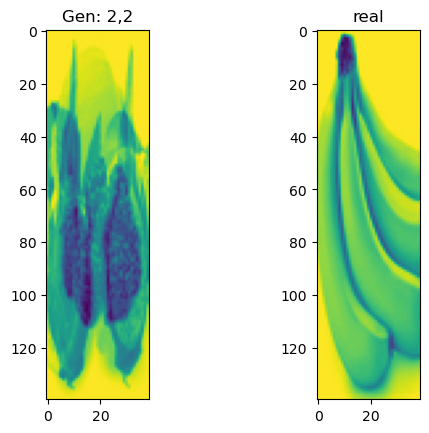

In [49]:
the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(1)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")

[5 2 4]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [253 253 253 ... 229 230 230]
 [254 254 254 ... 233 233 233]
 [253 254 254 ... 240 240 241]]
<PIL.Image.Image image mode=L size=39x140 at 0x27E877D0450>
[5 2 0]
[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [255 255 255 ... 255 255 255]
 ...
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [253 253 253 ... 253 253 253]]
<PIL.Image.Image image mode=L size=39x140 at 0x27E878E9510>


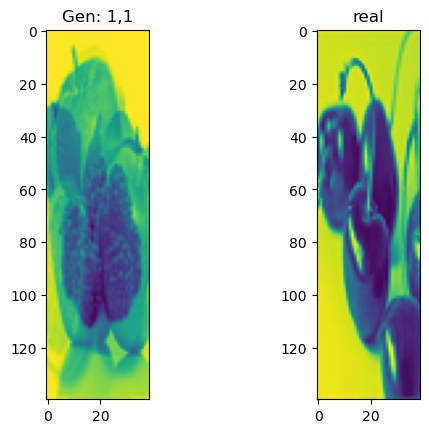

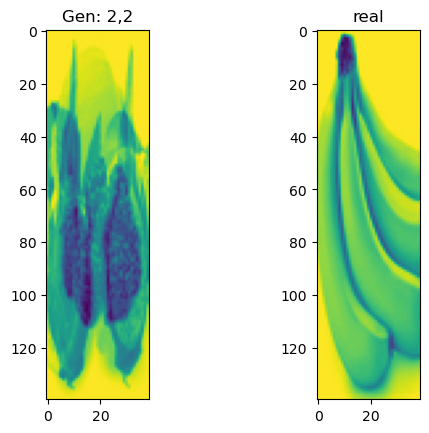

In [50]:
for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")